<font color='red' size=6>Resume Screening with Natural Language Processing in Python</font>

<font color='blue' size=6>Importation des bibliothèques </font>

In [2]:

import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

<font color='blue' size=6>Prétraitement</font>

In [3]:
data = pd.read_csv("ResumeDataSet.csv")
resume = pd.DataFrame(data)
resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
resume.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [6]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
resume.isnull().sum()

Category    0
Resume      0
dtype: int64

In [8]:
resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [9]:
resume.drop_duplicates (subset = None, keep = 'first', inplace = False)
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


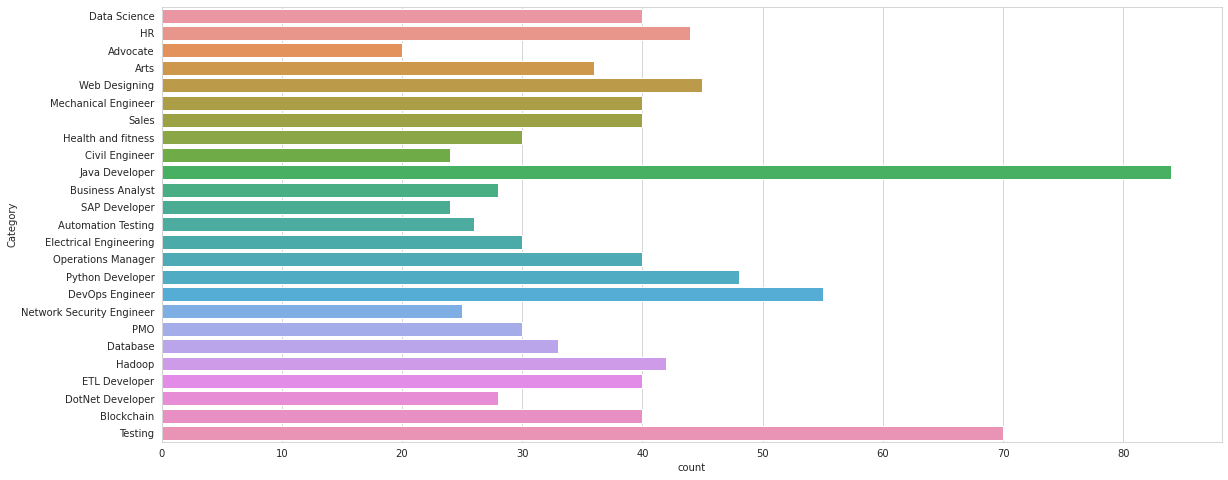

In [10]:
plt.figure(figsize=(19,8))
sns.set_style("whitegrid")
sns.set_palette('Set2')
sns.countplot(data=resume,y=resume['Category'])
plt.show()

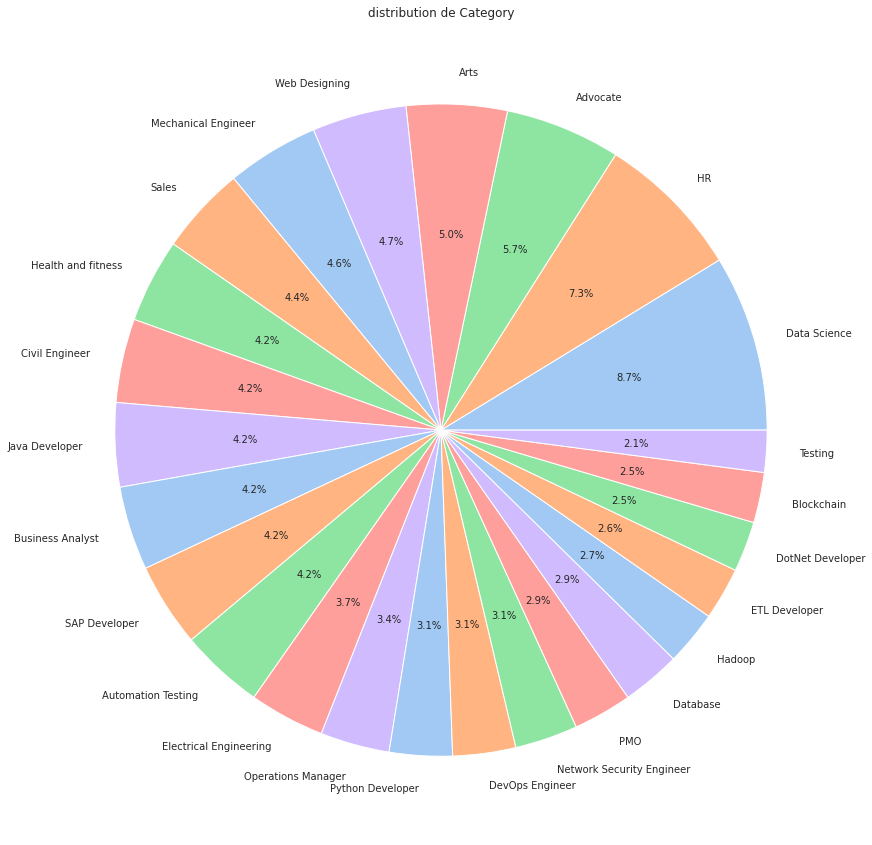

In [11]:
colors = sns.color_palette('pastel')[0:5]
labels = resume['Category'].unique()
data = resume['Category'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('distribution de Category')
plt.show()

<font color='blue' size=6>Data Preprocessing</font>

# clean resume

In [12]:
import re 
def clean(text):
    text = text.lower()
    text = re.sub('http\S+\s*',' ',text)
    text = text.replace('*',' ')
    text = re.sub('RT|cc',' ',text)
    text = re.sub('#\S+', '', text)  
    text = re.sub('@\S+', '  ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text) 
    return text


resume['clean_resume'] = resume['Resume'].apply(lambda text : clean(text))
resume

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


# stopWords

In [13]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
resume

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


# Tokenization et Lemmatization

In [15]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
resume['correction_word'] = ""
for i in range(resume.shape[0]):
  text = resume['clean_resume'][i]
  tokens = tokenizer.tokenize(text)
  lemer = nltk.stem.WordNetLemmatizer()
  text = " ".join(lemer.lemmatize(token) for token in tokens)
  resume['correction_word'][i] = text

resume

,Category,Resume,clean_resume,correction_word
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...,education detail may 2013 to may 2017 b e uit ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,area of interest deep learning control system ...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,education detail mca ymcaust faridabad haryana...
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...,computer skill proficient in m office word bas...
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...,willingness to a ept the challenge positive th...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...,personal skill quick learner eagerness to lear...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...,computer skill software knowledge m power poin...


In [19]:
data_resume = resume.copy()
data_resume = data_resume.drop(['Resume','clean_resume'],axis=1)
data_resume

,Category,correction_word
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may 2013 to may 2017 b e uit ...
2,Data Science,area of interest deep learning control system ...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...
957,Testing,computer skill proficient in m office word bas...
958,Testing,willingness to a ept the challenge positive th...
959,Testing,personal skill quick learner eagerness to lear...
960,Testing,computer skill software knowledge m power poin...


# removing Stopwords

In [21]:
def delete_classfermer(text_resume):

  list_Stopword = set(stopword+['``',"''"])
  words = nltk.word_tokenize(text_resume)
  clean_words = []
  for word in words :
    if word not in list_Stopword and word not in string.punctuation:
      clean_words.append(word)
  result =""
  for word in clean_words:
    result += word
    result += " "

  return (result)

In [23]:
data_resume['clean_stop_word'] = " "
for i in range(data_resume.shape[0]):
  text = delete_classfermer(data_resume['correction_word'][i])
  data_resume['clean_stop_word'][i] = text 

data_resume

,Category,correction_word,clean_stop_word
0,Data Science,skill programming language python panda numpy ...,skill programming language python panda numpy ...
1,Data Science,education detail may 2013 to may 2017 b e uit ...,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,area of interest deep learning control system ...,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...,education detail mca ymcaust faridabad haryana...
...,...,...,...
957,Testing,computer skill proficient in m office word bas...,computer skill proficient office word basic ex...
958,Testing,willingness to a ept the challenge positive th...,willingness ept challenge positive thinking go...
959,Testing,personal skill quick learner eagerness to lear...,personal skill quick learner eagerness learn n...
960,Testing,computer skill software knowledge m power poin...,computer skill software knowledge power point ...


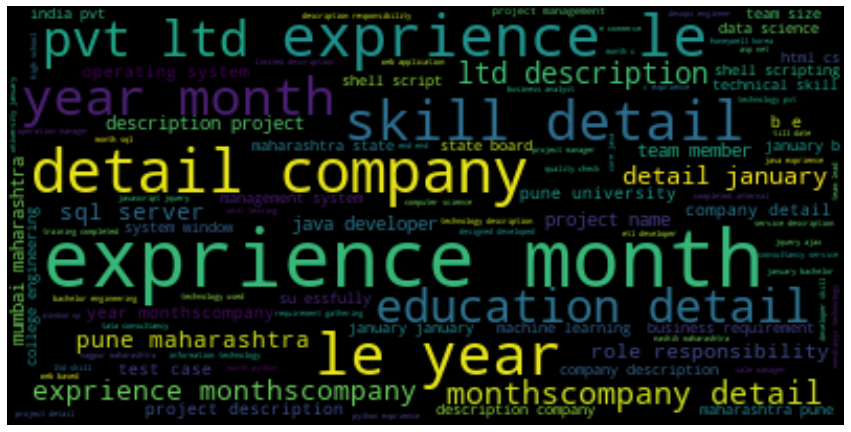

In [24]:
cv = data_resume['clean_stop_word'].values
resume_correction =""
for records in cv :
  resume_correction = resume_correction + records

wordcloud = WordCloud().generate(resume_correction)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
def words_total() :
  word_list = []
  for i in range(data_resume.shape[0]):
    text = delete_classfermer(data_resume['correction_word'][i])
    word = nltk.word_tokenize(text)
    for w in word:
      word_list.append(w)
  return word_list
word_list = words_total()

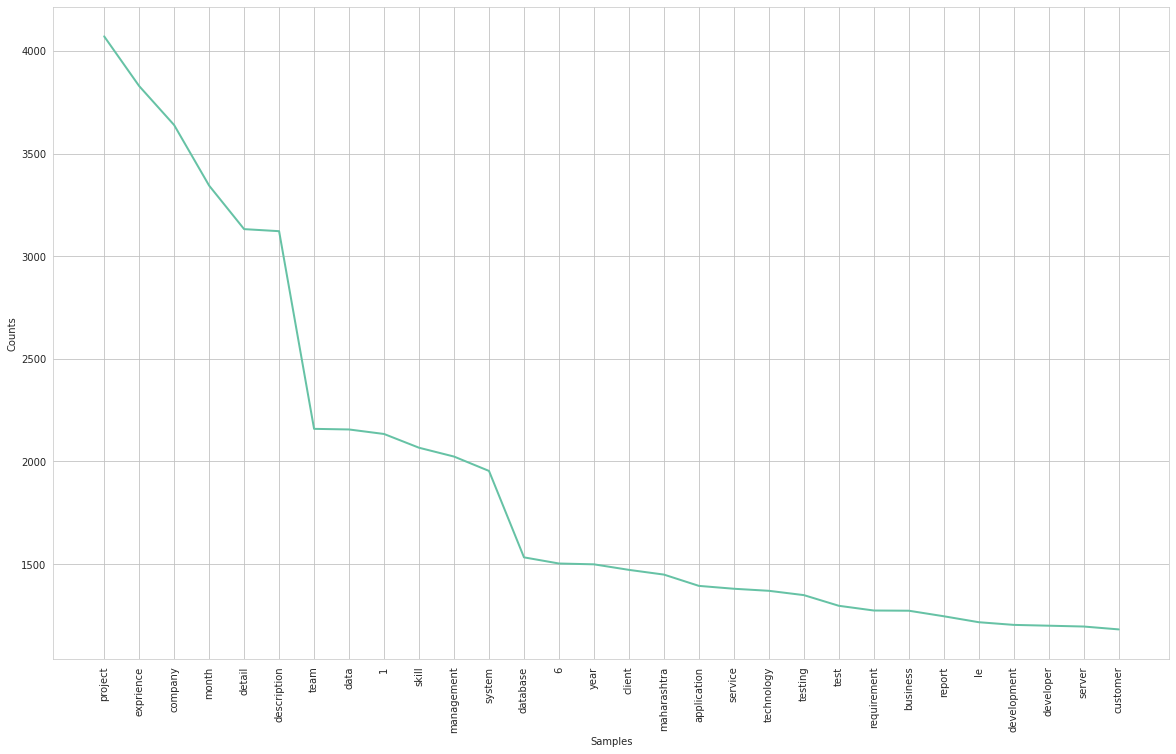

In [26]:
#les frequences des words
wordfreq = nltk.FreqDist(word_list)
plt.subplots(figsize=(20,12))
wordfreq.plot(30)

## **Encoding Category**

In [27]:
lbe = LabelEncoder()
label = ['Category']
for i in label:
  data_resume[i] = lbe.fit_transform(data_resume[i])
data_resume

,Category,correction_word,clean_stop_word
0,6,skill programming language python panda numpy ...,skill programming language python panda numpy ...
1,6,education detail may 2013 to may 2017 b e uit ...,education detail may 2013 may 2017 b e uit rgp...
2,6,area of interest deep learning control system ...,area interest deep learning control system des...
3,6,skill r python sap hana tableau sap hana sql s...,skill r python sap hana tableau sap hana sql s...
4,6,education detail mca ymcaust faridabad haryana...,education detail mca ymcaust faridabad haryana...
...,...,...,...
957,23,computer skill proficient in m office word bas...,computer skill proficient office word basic ex...
958,23,willingness to a ept the challenge positive th...,willingness ept challenge positive thinking go...
959,23,personal skill quick learner eagerness to lear...,personal skill quick learner eagerness learn n...
960,23,computer skill software knowledge m power poin...,computer skill software knowledge power point ...


**preprocess and convert the ‘resume’  into vectors.**

# <font color='blue' size=6>Model Building</font>

In [28]:
X = data_resume['clean_stop_word'].values 
Y = data_resume['Category'].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0, test_size=0.2)
print("X : ",X.shape)
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("Y : ",Y.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)


X :  (962,)
x_train :  (769,)
x_test :  (193,)
Y :  (962,)
y_train :  (769,)
y_test :  (193,)


<font color='blue' size=6>TF-IDF</font>

In [29]:
tfidf = TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2),max_features=3000,sublinear_tf=True,stop_words='english').fit(x_train)
x_train_vectorized = tfidf.transform(x_train)

In [30]:
WordFeatures = tfidf.fit_transform(data_resume['clean_stop_word'].values)
pd.DataFrame(
      WordFeatures.todense(),
      columns =tfidf.get_feature_names()
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,01,07,07 08,08,10,10 day,10 linux,10g,11,11g,...,year,year experience,year month,year monthscompany,year project,yes,york,zaggle,zaggle prepaid,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.023294,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.146201,0.0,0.191355,0.072800,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.130655,0.0,0.175023,0.058981,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.048670,0.0,0.058254,0.024235,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.245478,0.0,0.321294,0.122234,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
958,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.062083,0.0,0.051345,0.050972,0.000000,0.0,0.0,0.0,0.0,0.0
959,0.0,0.0,0.0,0.0,0.034180,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
960,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.060905,0.0,0.000000,0.000000,0.146029,0.0,0.0,0.0,0.0,0.0


<font color='blue' size=6>OneVsRest Model</font>


In [31]:

OneVsRest = OneVsRestClassifier(KNeighborsClassifier())
OneVsRest.fit(x_train_vectorized,y_train)
prediction = OneVsRest.predict(tfidf.transform(x_test))
prediction


array([20, 14,  8, 17, 15, 14, 10, 14, 15, 19,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16, 23,  8,  3,  9, 20, 18, 22,  7,
       23, 23, 22, 18, 12, 20, 10, 20, 14,  8, 15, 15,  8,  0,  4, 22, 14,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0,  6, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8, 12, 19, 18, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23,  0,  9, 23,  0, 15, 23, 13,  4, 17,
        2, 23,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 18,  8, 14,
        6,  4,  4, 23,  7,  9, 13, 23,  9,  9,  9, 21, 11, 23,  3,  9, 24,
       19, 13,  8,  3, 13, 13,  0, 20, 12, 23, 21, 24,  7, 21, 20, 15, 22,
       19,  6, 23,  9, 15, 15,  6,  2, 20,  1,  0, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23, 14, 23,  9,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15])

**Computing the accuracy metrics and classification report**

In [32]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(OneVsRest.score(x_train_vectorized, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(OneVsRest.score(tfidf.transform(x_test), y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.87


In [33]:
print("Accuracy of KNeighbors Classifier : ",accuracy_score(y_test,prediction))
print("classification report \n",classification_report(y_test, prediction))

Accuracy of KNeighbors Classifier :  0.8652849740932642
classification report 
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.50      0.33      0.40         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       0.83      0.83      0.83         6
           5       1.00      0.20      0.33         5
           6       0.71      0.56      0.63         9
           7       1.00      0.57      0.73         7
           8       0.83      0.91      0.87        11
           9       0.75      1.00      0.86         9
          10       1.00      1.00      1.00         8
          11       1.00      0.44      0.62         9
          12       0.62      1.00      0.77         5
          13       1.00      1.00      1.00         9
          14       0.78      1.00      0.88         7
          15       1.00      0.89      0.94        19
 

# <font color='blue' size=6>nouvelle exemple</font>


In [35]:
from nltk.tokenize import sent_tokenize
import numpy as np
corpus = data_resume.copy()
exp1 = corpus['clean_stop_word'][0]
exp2 = corpus['clean_stop_word'][961]
ph1 = sent_tokenize(exp1)
ph2 = sent_tokenize(exp2)

In [36]:
cv1 = tfidf.transform(ph1)
cv2 = tfidf.transform(ph2)

In [37]:
p1 = OneVsRest.predict(cv1)
print('*************************************************')
print(        "le category est : ",p1, lbe.classes_[p1]      )
print('*************************************************')

*************************************************
le category est :  [6] ['Data Science']
*************************************************


In [38]:
p2 = OneVsRest.predict(cv2)
print('*************************************************')
print(        "le category est : ",p2, lbe.classes_[p2]      )
print('*************************************************')

*************************************************
le category est :  [23] ['Testing']
*************************************************


In [39]:
exp3 = " Data Scientist avec 6 ans d’expérience et des compétences et expertises remarquables de veille et évaluation de diverses nouvelles technologies, du développement de l’informatique décisionnelle et de l’évolution du Big Data. Rigoureuse, force de proposition et investie dans la réalisation des objectifs et l’amélioration des performances marketing au sein de mon entreprise. Extraction, analyse et recommandations stratégiques grâce à la science de la donnée sont mes missions et passions quotidiennes.  Expérience professionnelle  Data Scientist –  NellArmonia, Paris . 2016 / Aujourd’hui  Mise à jour des Bases de données internes et externes Conception et mise en oeuvre des outils et algorithme de fonctionnement Analyses statistiques Machine learning et Data Engineering Gestion, analyse et prévision des données Veille technologiques ( Data mining) Coordination et interface inter-équipes Traitement des données avec des outils et méthodes statistiques Communication interpole Amélioration des performances et décisions stratégique marketing (+39% moyenne annuelle) Assistant Chef de projet Business Intelligence – Anaplan, Nice. Alternance  – 2014 / 2016  Pilotage et optimisation des processus d’analyse de données au sein de l’entreprise Rédaction de support et mise à disposition d’indicateurs et de tableaux de bords pour assurer le suivi de toutes les activités de l’entreprise. Gestion de projets internationaux en relation avec la BI Diversification et augmentation du nombre des clients (+90% en 2021) Production de données et tableaux de bords pertinents pour la prise de décision au sein des autres départements Collaboration avec une équipe de Data Analyst afin d’optimiser nos performances d’analyse Economie des ressources budgétaires et optimisation du temps Élue “Ambassadrice du Groupe Anaplan à l’échelle internationale” Formations  Master spécialisé en Big Data,  EPITA Nice – 2014/2016 Licence en Data Science, CNAM Paris – 2011/2014 Compétences  Réalisation de veille concurrentielle (collecte, extraction et analyse des données) Définition et maîtrise des outils de traitement des données Expertise dans les outils informatiques et langage de programmation Adaptation des outils de traitement statistique des données Présentation des résultats des études réalisées Deep Learning Data engineering Soft Skills  Gestion d’équipe Communication Force de proposition Rigueur et assiduité Sens de l’organisation Langues  Anglais : Bilingue"

In [40]:
ph3 = sent_tokenize(exp3)
cv3 = tfidf.transform(ph3)

In [41]:
p3 = OneVsRest.predict(cv3)
print('*************************************************')
print(        "le category est : ",p3, lbe.classes_[p3]      )
print('*************************************************')

*************************************************
le category est :  [11  3  6 23 22 17  6] ['Electrical Engineering' 'Blockchain' 'Data Science' 'Testing' 'Sales'
 'Network Security Engineer' 'Data Science']
*************************************************
